# Анализ выгрузки финансов

In [1]:
# импорт библиотек
# работа с данными
import numpy as np
import pandas as pd

# графика
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
# чтение csv
df = pd.read_csv('fin.csv', sep=';')

In [3]:
# обзор данных
df.head()

,Дата операции,Дата платежа,Номер карты,Статус,Сумма операции,Валюта операции,Сумма платежа,Валюта платежа,Кэшбэк,Категория,MCC,Описание,Бонусы (включая кэшбэк),Округление на инвесткопилку,Сумма операции с округлением
0,14.03.2025 12:21:06,14.03.2025,*7267,OK,"-700,00",RUB,"-700,00",RUB,7.0,Красота,7230.0,Супермен,"7,00","0,00","700,00"
1,13.03.2025 18:16:07,13.03.2025,*7267,OK,"-964,93",RUB,"-964,93",RUB,9.0,Супермаркеты,5411.0,Пятёрочка,"9,00","0,00","964,93"
2,13.03.2025 11:41:04,13.03.2025,*7267,OK,"-579,94",RUB,"-579,94",RUB,5.0,Супермаркеты,5411.0,Магнит,"5,00","0,00","579,94"
3,13.03.2025 11:22:16,13.03.2025,*7267,OK,"-94,90",RUB,"-94,90",RUB,NaN,Супермаркеты,5411.0,SPAR,"0,00","0,00","94,90"
4,12.03.2025 22:16:04,13.03.2025,*7267,OK,"-906,00",RUB,"-906,00",RUB,45.0,Такси,4121.0,Яндекс Такси,"45,00","0,00","906,00"


In [4]:
# удаление лишних данных
df = df[['Дата операции', 'Сумма операции', 'Категория', 'Описание']]
#df.head()

In [5]:
# переименование столбцов
df.columns = ['dt', 'sum', 'category', 'description']
df.head()

,dt,sum,category,description
0,14.03.2025 12:21:06,"-700,00",Красота,Супермен
1,13.03.2025 18:16:07,"-964,93",Супермаркеты,Пятёрочка
2,13.03.2025 11:41:04,"-579,94",Супермаркеты,Магнит
3,13.03.2025 11:22:16,"-94,90",Супермаркеты,SPAR
4,12.03.2025 22:16:04,"-906,00",Такси,Яндекс Такси


In [6]:
# анализ типов данных
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3085 entries, 0 to 3084
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   dt           3085 non-null   object
 1   sum          3085 non-null   object
 2   category     3070 non-null   object
 3   description  3085 non-null   object
dtypes: object(4)
memory usage: 96.5+ KB


In [7]:
# приведение типов
df['dt'] = pd.to_datetime(df['dt'])
df['sum'] = pd.to_numeric(df['sum'].str.replace(',', '.'))

C:\Users\andro\AppData\Local\Temp\ipykernel_10796\193403239.py:2: UserWarning: Parsing dates in %d.%m.%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['dt'] = pd.to_datetime(df['dt'])


In [8]:
# анализ содержимого
df.describe(include='all').T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
dt,3085,NaN,NaN,NaN,2023-07-24 21:53:07.212965888,2021-05-10 11:50:01,2022-04-03 14:37:54,2024-01-05 15:46:42,2024-08-27 22:58:10,2025-03-14 12:21:06,NaN
sum,3085.0,NaN,NaN,NaN,-95.432885,-700000.0,-686.83,-245.98,-79.0,770765.02,39463.587553
category,3070,43,Супермаркеты,755,NaN,NaN,NaN,NaN,NaN,NaN,NaN
description,3085,439,Пятёрочка,372,NaN,NaN,NaN,NaN,NaN,NaN,NaN


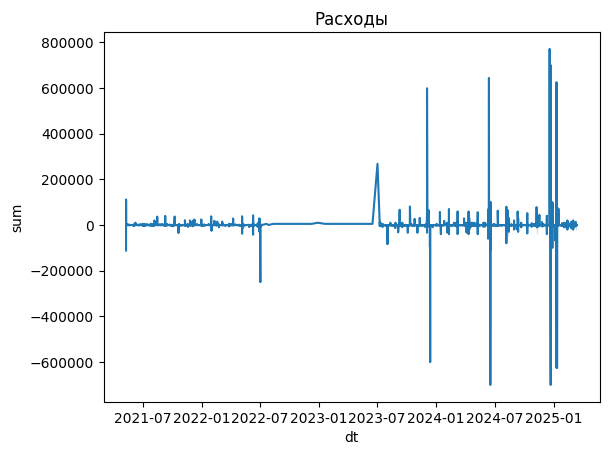

In [9]:
# график трат
ax = sns.lineplot(x='dt', y='sum', data=df)
ax.set_title('Расходы')
plt.show()